# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Importing Modules and Libraries</p>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import xgboost as xgb
from lightgbm import LGBMRegressor

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Loading Data</p>

In [2]:
newdata=pd.read_csv('/kaggle/input/house-price-prediction-dataset/csvdata.csv').drop(['Unnamed: 0'],axis=1)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">EDA and Visualization</p>

In [3]:
from matplotlib import cm
c1=cm.get_cmap('Set1')

Text(0.5, 1.0, 'Distribution of Price')

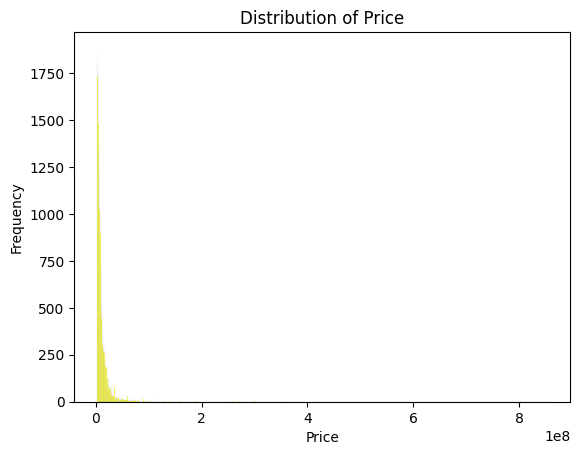

In [4]:

sb.histplot(newdata['Price'],color=c1(0.6))
plt.ylabel('Frequency')
plt.title('Distribution of Price')

<Axes: xlabel='Area', ylabel='Price'>

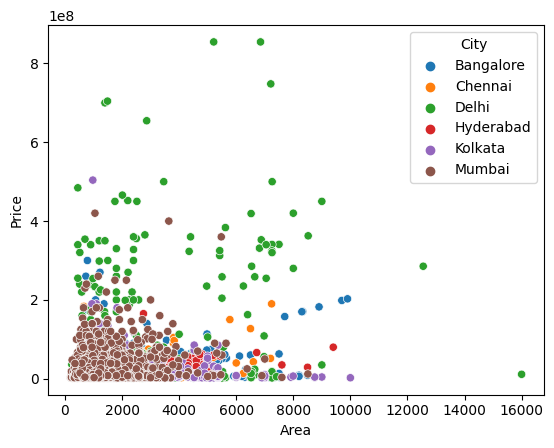

In [5]:
sb.scatterplot(data=newdata,x='Area',y='Price',hue='City')

<div style="border-radius: 10px; border: rgb(41, 128, 185) solid; padding: 15px; background-color: rgb(52, 73, 94); font-size: 100%; text-align: left; color: #ecf0f1; box-shadow: 0 0 15px rgba(41, 128, 185, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>Delhi houses are expensive</strong></li>
        <li><strong>Mumbai and Kolkata houses are cheap</strong></li>
        <li><strong>Mostly houses are in 0 to 8000 Area</strong></li>
    </ul>
</div>


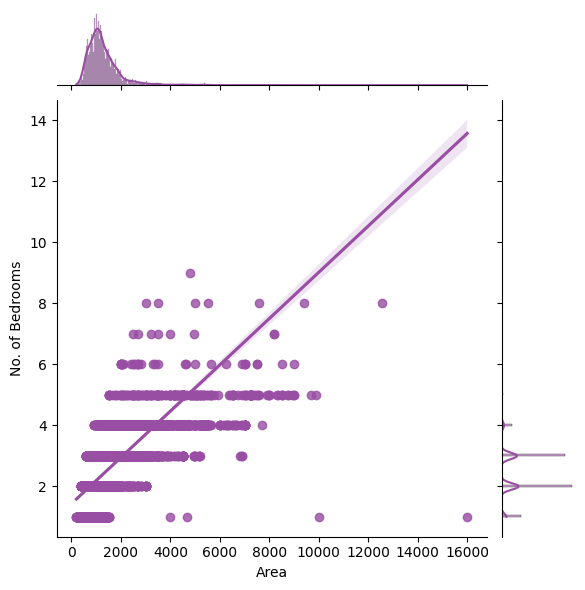

In [6]:
sb.jointplot(data=newdata,y='No. of Bedrooms',x='Area',kind='reg',color=c1(0.4))

Text(0.5, 1.0, 'Maximum Area range in each Cities')

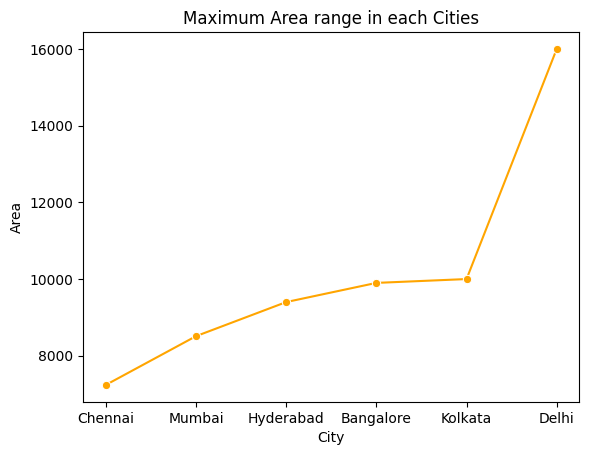

In [7]:
sb.lineplot(newdata.groupby(['City'])['Area'].max().sort_values(),marker='o',color='orange')
plt.title('Maximum Area range in each Cities')

Text(0.5, 1.0, 'Minimum Area range in each Cities')

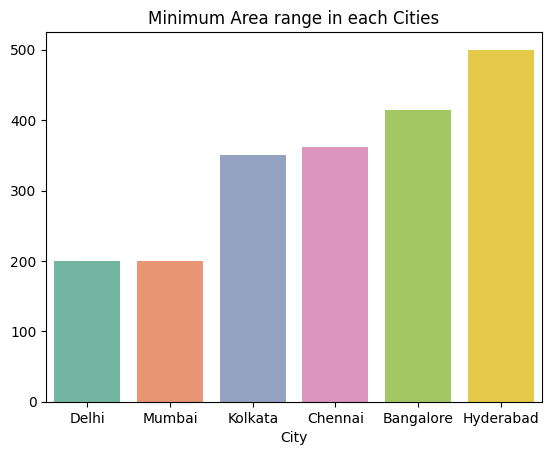

In [8]:
data=newdata.groupby(['City'])['Area'].min().sort_values()
sb.barplot(x=data.index,y=data.values,palette='Set2')
plt.title('Minimum Area range in each Cities')

In [9]:
list1=[]
for i in range(6):
    list1.append((list(newdata.groupby(['City']))[i][0],list(newdata.groupby(['City']))[i][1]['Location'].value_counts()))

In [10]:
for i,j in list1:
    print(i)
    print(j.head(5))
    print('-'*50)

('Bangalore',)
Location
Electronic City Phase 2    179
Begur                      176
RR Nagar                   149
Kumaraswamy Layout         144
Varthur                    134
Name: count, dtype: int64
--------------------------------------------------
('Chennai',)
Location
Medavakkam        200
Sholinganallur    156
Karapakkam        134
Nanmangalam       129
Ambattur          123
Name: count, dtype: int64
--------------------------------------------------
('Delhi',)
Location
Uttam Nagar        375
Noida              342
Dwarka Mor         302
Vasant Kunj        225
Sector 6 Dwarka    103
Name: count, dtype: int64
--------------------------------------------------
('Hyderabad',)
Location
Kondapur      131
Kukatpally    119
Manikonda     105
Nizampet       73
Gachibowli     73
Name: count, dtype: int64
--------------------------------------------------
('Kolkata',)
Location
New Town    687
Rajarhat    403
Tangra      359
Garia       297
Dum Dum     296
Name: count, dtype: int64
----

<div style="border: 2px solid #3498db; border-radius: 5px; padding: 10px; text-align: center; box-shadow: 0 0 15px rgba(52, 152, 219, 0.7);">
    <p style="font-family: 'JetBrains Mono', monospace; font-weight: bold; letter-spacing: 2px; color: #2c3e50; font-size: 140%; text-shadow: 0 0 10px rgba(52, 152, 219, 0.7); margin: 0;">To be Continue</p>
</div>


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Machine Learning</p>

In [11]:
newdata1=newdata.drop(['City','Location'],axis=1)

In [12]:
newdata1.drop_duplicates(inplace=True)

In [13]:
newdata1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25580 entries, 0 to 29134
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Price            25580 non-null  int64
 1   Area             25580 non-null  int64
 2   No. of Bedrooms  25580 non-null  int64
dtypes: int64(3)
memory usage: 799.4 KB


In [14]:
model1=RandomForestRegressor()
model2=LinearRegression()
model3=KNeighborsRegressor()
model4=SVR()
model5=BaggingRegressor()
model6=LGBMRegressor()
model7=xgb.XGBRegressor()

In [15]:
x=newdata1.drop('Price',axis=1)
target=newdata1.Price
xtra,xtest,ytra,ytest=train_test_split(x,target,test_size=0.2)

In [16]:
ss=('std',StandardScaler())
mm=('mm',MinMaxScaler())
trans=ColumnTransformer([ss,mm],remainder='passthrough')

In [17]:
pipe1=Pipeline(steps=[ss,mm,('Model1',model1)])
pipe2=Pipeline(steps=[ss,mm,('Model2',model2)])
pipe3=Pipeline(steps=[ss,mm,('Model3',model3)])
pipe4=Pipeline(steps=[ss,mm,('Model4',model4)])
pipe5=Pipeline(steps=[ss,mm,('Model5',model5)])
pipe6=Pipeline(steps=[ss,mm,('Model6',model6)])
pipe7=Pipeline(steps=[ss,mm,('Model7',model7)])

In [18]:
pipe1.fit(xtra,ytra)

Pipeline(steps=[('std', StandardScaler()), ('mm', MinMaxScaler()),
                ('Model1', RandomForestRegressor())])

In [19]:
pipe2.fit(xtra,ytra)

Pipeline(steps=[('std', StandardScaler()), ('mm', MinMaxScaler()),
                ('Model2', LinearRegression())])

In [20]:
pipe3.fit(xtra,ytra)

Pipeline(steps=[('std', StandardScaler()), ('mm', MinMaxScaler()),
                ('Model3', KNeighborsRegressor())])

In [21]:
pipe4.fit(xtra,ytra)

Pipeline(steps=[('std', StandardScaler()), ('mm', MinMaxScaler()),
                ('Model4', SVR())])

In [22]:
pipe5.fit(xtra,ytra)

Pipeline(steps=[('std', StandardScaler()), ('mm', MinMaxScaler()),
                ('Model5', BaggingRegressor())])

In [23]:
pipe6.fit(xtra,ytra)

Pipeline(steps=[('std', StandardScaler()), ('mm', MinMaxScaler()),
                ('Model6', LGBMRegressor())])

In [24]:
pipe7.fit(xtra,ytra)

Pipeline(steps=[('std', StandardScaler()), ('mm', MinMaxScaler()),
                ('Model7',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4F200D; font-size:140%; text-align:center;padding: 0px; border-bottom: 3px solid #4F200D">Cross Val Test</p>

In [25]:
cross_val_score(pipe1,xtra,ytra,scoring='r2')

array([-0.00293772, -0.05520832, -0.11764502, -0.01171006, -0.06633157])

In [26]:
cross_val_score(pipe2,xtra,ytra,scoring='r2')

array([0.12055084, 0.07000845, 0.0662239 , 0.0812531 , 0.03639836])

In [27]:
cross_val_score(pipe3,xtra,ytra,scoring='r2')

array([-0.18498287, -0.05053815, -0.11577355, -0.12128753, -0.08550767])

In [28]:
cross_val_score(pipe4,xtra,ytra,scoring='r2')

array([-0.04535627, -0.04377784, -0.04912004, -0.05894736, -0.04873068])

In [29]:
cross_val_score(pipe5,xtra,ytra,scoring='r2')

array([ 0.01380134, -0.12566297, -0.1286427 , -0.09750135, -0.11022386])

In [30]:
cross_val_score(pipe6,xtra,ytra,scoring='r2')

array([0.17570169, 0.0663131 , 0.05239343, 0.11264396, 0.02921097])

In [31]:
cross_val_score(pipe7,xtra,ytra,scoring='r2')

array([0.13265298, 0.03061917, 0.06737765, 0.0616956 , 0.01597374])

<div style="border-radius: 10px; border: rgb(229, 124, 35) solid; padding: 15px; background-color: rgb(255, 250, 240); font-size: 100%; text-align: left; box-shadow: 0 0 15px rgba(229, 124, 35, 0.7);">
    <ul style="margin: 0; padding-left: 20px; list-style-type: square;">
        <li><strong>The Cross Val score tells that the values are not robust</strong></li>
    </ul>
</div>
